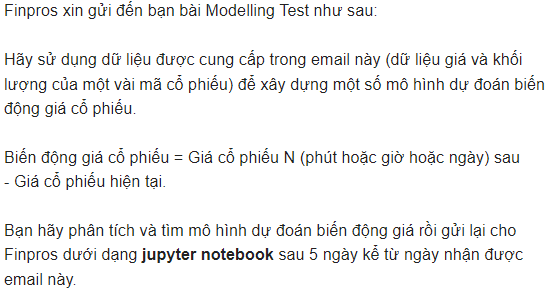

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

In [2]:
# Warning Removal
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [3]:
df1 = pd.read_csv('MSN.csv')
df2 = pd.read_csv('PNJ.csv')
df3 = pd.read_csv('VIC.csv')
df4 = pd.read_csv('FPT.csv')

In [4]:
df1.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         135354 non-null  object 
 1   Date/Time      135354 non-null  object 
 2   Open           135354 non-null  float64
 3   High           135354 non-null  float64
 4   Low            135354 non-null  float64
 5   Close          135354 non-null  float64
 6   Volume         135354 non-null  int64  
 7   Open Interest  135354 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 8.3+ MB


In [6]:
df1.describe()

,Open,High,Low,Close,Volume,Open Interest
count,135354.000000,135354.000000,135354.000000,135354.000000,1.353540e+05,135354.0
mean,74.878809,74.931668,74.834625,74.880759,5.683578e+03,0.0
std,15.418074,15.426954,15.412677,15.418857,2.798513e+04,0.0
min,46.500000,46.500000,46.400000,46.400000,1.000000e+01,0.0
25%,57.900000,57.900000,57.800000,57.800000,5.000000e+02,0.0
50%,79.100000,79.200000,79.100000,79.100000,2.000000e+03,0.0
75%,86.000000,86.100000,86.000000,86.000000,5.560000e+03,0.0
max,117.800000,118.000000,117.700000,118.000000,3.300680e+06,0.0


In [7]:
def clean_data(df):
    # drop None value
    df.dropna(inplace=True)
    # drop duplicated row
    df.drop_duplicates(inplace=True)
    # Change Date/Time type from object to datetime
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    # Select only Y - M - D
    df['Date'] = df['Date/Time'].dt.date
    # Group by day to fit the model
    data = df.groupby(['Date'], as_index=False).agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    })
    # data['Ticker'] = df.Ticker[1]
    # # Add column represent Price fluctuation
    # data['Change'] = data['Close'].shift(-1) - data['Close']
    # # Add column represent the number of days to the next nearest trading day
    # data['NextDay'] = data['Date'].shift(-1) - data['Date']
    # # data['NextDay'] = data['NextDay'].dt.days
    # # Add the column Close price of the next nearest trading day
    # data['NextClose'] = data['Close'].shift(-1)
    # # Drop the last and the first because it contain NaN
    # data = data[1:-1]
    # As far as I research, the 4 given stocks are traded on HoSE,
    # price fluctuation can not exceed 7% compare to the closest previous Close price
    return data

In [8]:
df1=clean_data(df1)
df2=clean_data(df2)
df3=clean_data(df3)
df4=clean_data(df4)

In [9]:
df12 = df1.merge(df2,on='Date',suffixes=['_MSN','_PNJ'])
df34 = df3.merge(df4,on='Date',suffixes=['_VIC','_FPT'])
combine = df12.merge(df34,on='Date')
combine.head()

,Date,Open_MSN,High_MSN,Low_MSN,Close_MSN,Volume_MSN,Open_PNJ,High_PNJ,Low_PNJ,Close_PNJ,...,Open_VIC,High_VIC,Low_VIC,Close_VIC,Volume_VIC,Open_FPT,High_FPT,Low_FPT,Close_FPT,Volume_FPT
0,2018-12-25,78.9,80.4,77.9,80.0,562070,67.15,69.27,66.86,67.36,...,100.1,101.9,100.1,101.9,293610,30.89,30.89,30.59,30.66,84960
1,2018-12-26,80.0,80.2,79.0,79.0,577200,67.36,67.94,67.15,67.22,...,101.0,101.9,101.0,101.9,367750,31.04,31.22,30.89,30.89,333590
2,2018-12-27,80.0,80.5,79.0,79.0,425950,68.66,70.00,67.94,68.15,...,101.0,102.9,101.0,102.4,690680,31.41,31.52,31.19,31.19,454860
3,2018-12-28,79.4,80.0,77.5,77.5,546000,68.66,69.78,67.86,69.04,...,103.3,103.4,95.3,95.3,381320,31.34,31.49,31.19,31.49,387170
4,2019-01-02,78.9,78.9,78.2,78.6,433670,67.57,69.49,66.70,66.70,...,101.2,101.3,97.5,100.4,602450,31.19,31.45,30.70,30.74,459120


In [10]:
combine['MSN_TARGET'] = combine['Close_MSN'].shift(-5) - combine['Close_MSN']
combine['VIC_TARGET'] = combine['Close_VIC'].shift(-5) - combine['Close_VIC']
combine['FPT_TARGET'] = combine['Close_FPT'].shift(-5) - combine['Close_FPT']
combine['PNJ_TARGET'] = combine['Close_PNJ'].shift(-5) - combine['Close_PNJ']

In [12]:
combine = combine[:-5]
combine.tail()

,Date,Open_MSN,High_MSN,Low_MSN,Close_MSN,Volume_MSN,Open_PNJ,High_PNJ,Low_PNJ,Close_PNJ,...,High_VIC,Low_VIC,Close_VIC,Volume_VIC,Open_FPT,High_FPT,Low_FPT,Close_FPT,Volume_FPT,MSN_TARGET
489,2020-12-09,84.49,84.69,84.00,84.39,840910,78.5,78.9,78.0,78.4,...,106.0,104.4,106.0,789790,56.3,57.8,56.2,57.5,3001820,-0.89
490,2020-12-10,84.39,84.39,82.61,82.91,1432910,78.5,78.8,73.0,73.0,...,106.9,104.9,104.9,979550,57.0,57.7,56.5,56.5,2112490,1.09
491,2020-12-11,82.91,83.60,82.22,83.50,791100,76.0,78.0,76.0,77.4,...,106.8,104.9,106.8,569360,56.6,57.0,56.3,57.0,1750270,0.60
492,2020-12-14,83.70,84.10,82.91,83.50,1079350,77.5,78.0,77.5,77.6,...,108.9,105.5,108.9,1122380,57.0,57.9,56.9,57.2,1443760,0.30
493,2020-12-15,83.50,83.80,82.91,83.50,935010,77.9,79.0,76.2,77.1,...,108.9,106.8,107.0,1205700,57.5,57.5,56.6,56.7,2666900,-0.70


<Axes: >

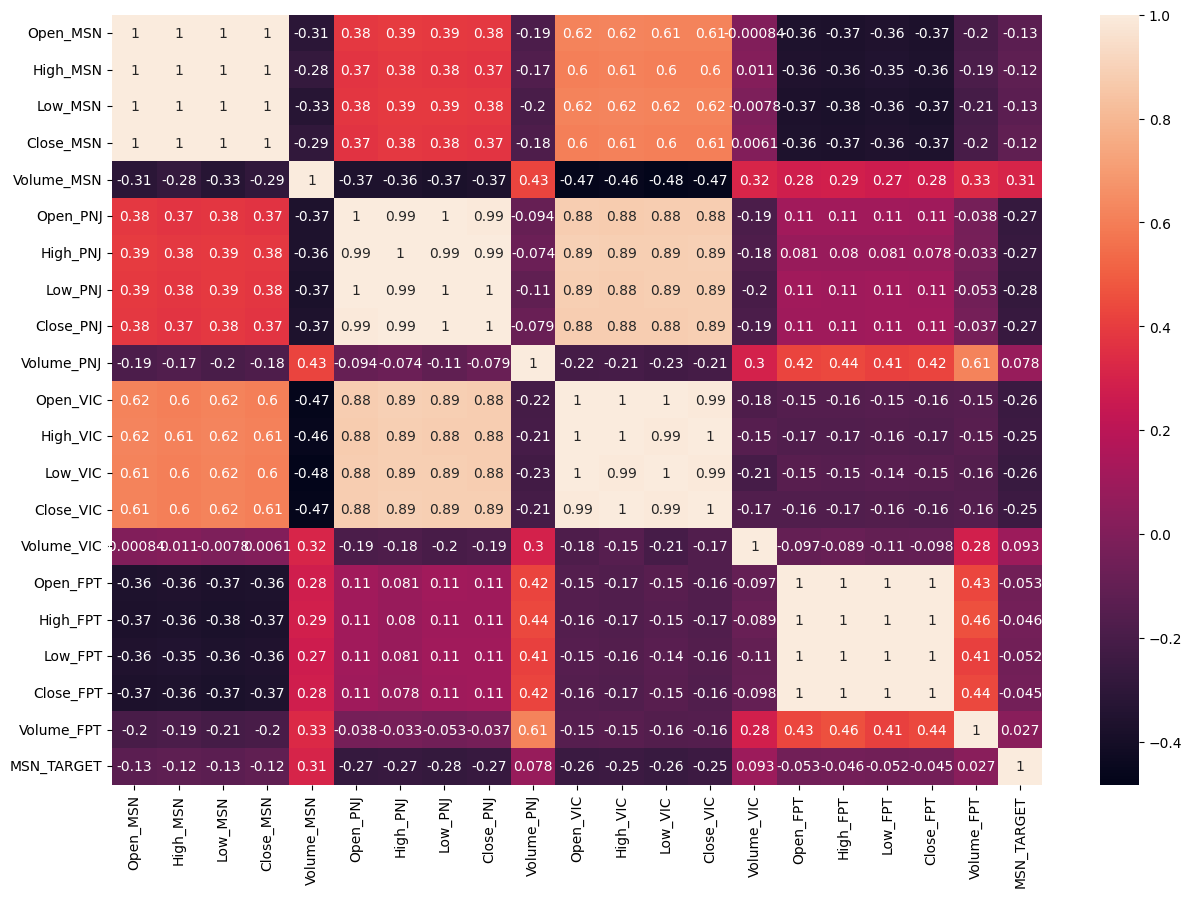

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(combine.iloc[:,1:].corr(),annot=True)

In [14]:
combine.index = combine.Date
combine = combine.drop("Date",axis=1)

# Split data to training and test set 
train, test = combine[:-5], combine[-5:] 
X_train, X_test = train.drop(['MSN_TARGET','VIC_TARGET','PNJ_TARGET','FPT_TARGET'],axis=1), test.drop(['MSN_TARGET','VIC_TARGET','PNJ_TARGET','FPT_TARGET'],axis=1)
y_train, y_test = train['MSN_TARGET'] , test['MSN_TARGET']



In [15]:
def evaluate_model(y_pred, y_train, X_train):
    fig, ax= plt.subplots(1,2,figsize=(10,5))
    sns.distplot((y_train-y_pred),ax= ax[0])
    # Checking Normality of errors
    ax[0].set_title("Histogram of Residuals")
    ax[0].set_xlabel("Residuals")
    ax[0].set_ylabel("Frequency")
    # The difference between actual close and predicted close price
    ax[1].scatter(y_pred,y_train)
    ax[1].set_ylabel("Close Prices")
    ax[1].set_xlabel("Predicted Close price")
    ax[1].set_title("Prices vs Predicted prices")
    plt.tight_layout()
    # Model Evaluation
    print('R^2:',metrics.r2_score(y_train,y_pred))
    print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
    print('MSE:', metrics.mean_squared_error(y_train, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
    return plt.show()

# Modeling

R^2: 0.9999373745837307
MAE: 0.019719414271277106
MSE: 0.000790757882523685
RMSE: 0.028120417538217403


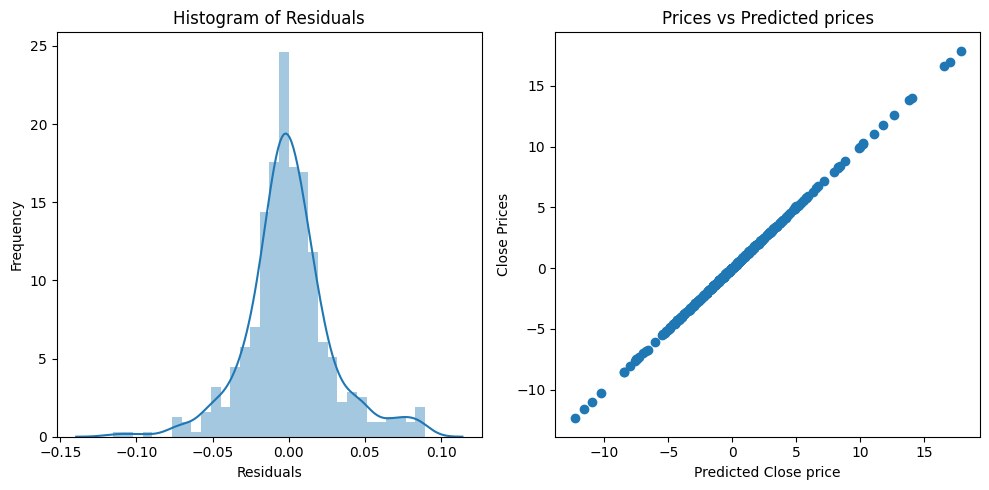

In [27]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xgb = XGBRegressor()
# Train the model using the training sets 
xgb.fit(X_train, y_train)
# Predict
y_pred = xgb.predict(X_train)
# Evaluate
evaluate_model(y_pred, y_train, X_train)

In [18]:
# Predicting Test data with the model
y_test_pred = xgb.predict(X_test)
print(f' R^2: {metrics.r2_score(y_test, y_test_pred)}')
print(f' MAE: {metrics.mean_absolute_error(y_test, y_test_pred)}')
print(f' MSE: {metrics.mean_squared_error(y_test, y_test_pred)}')
print(f' RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))}')

 R^2: -0.003341629091571985
 MAE: 0.7004703536033645
 MSE: 0.5795702586284568
 RMSE: 0.7612951192727146


+ This seem to be overfit

# Tunning

In [19]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        # 'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        "learning_rate": (0.05, 0.10, 0.15)
        }

grid_search = GridSearchCV(xgb, param_grid=params, scoring='neg_mean_squared_error', n_jobs=-1, cv= 3, verbose=0 )
grid_search.fit(X_train, y_train)
print('\n Best estimator:')
print(grid_search.best_estimator_)
best_xgb = grid_search.best_estimator_


# Result
# best_xgb = XGBRegressor(max_depth=5, min_child_weight=5, learning_rate=0.1, colsample_bytree=0.6, gamma=1)


 Best estimator:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1.5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


,XGBoost
R^2,0.142358
MAE,0.585717
MSE,0.495408
RMSE,0.703852


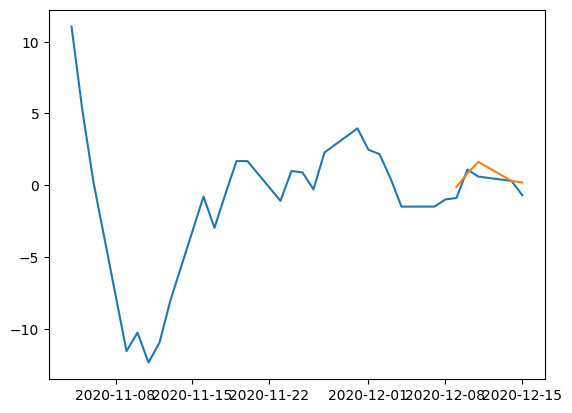

In [26]:
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

plt.plot(combine['MSN_TARGET'][-30:], label = "original")
plt.plot(pd.DataFrame(y_pred,index = y_test.index), label = "predicted")

xgb_score = pd.DataFrame([
    metrics.r2_score(y_test, y_pred),
    metrics.mean_absolute_error(y_test, y_pred),
    metrics.mean_squared_error(y_test, y_pred),
    np.sqrt(metrics.mean_squared_error(y_test, y_pred))
],
                   columns=['XGBoost'],
                   index=['R^2', 'MAE', 'MSE', 'RMSE'])
xgb_score